<a href="https://colab.research.google.com/github/MN1973/DataScienceProject/blob/main/7a_1_Subjectlines_DNN_UV_oversampled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=014c6781c7110405d9c62dd4ee35ce0d39e681ff251562b253b5e3a4b1b4f42f
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
pip install scikeras[tensorflow]

     |████████████████████████████████| 462 kB 35.3 MB/s 
     |████████████████████████████████| 97 kB 5.6 MB/s 
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
  Attempting uninstall: markdown
    Found existing installation: Markdown 3.3.6
    Uninstalling Markdown-3.3.6:
      Successfully uninstalled Markdown-3.3.6


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
import random
import tensorflow as tf
import pickle
import bz2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Mandar/Project/"
infile = open(DATA_PATH+'/9M.pkl','rb')
df = pickle.load(infile)

In [ ]:
df.shape

(9569374, 988)

In [ ]:
df.loc[df['nl_open'] < 0, 'nl_open'] = 0
df.loc[df['nl_open'] > 0, 'nl_open'] = 1

In [ ]:
df['nl_open'].value_counts()

0    9273287
1     296087
Name: nl_open, dtype: int64

In [ ]:
df.head()

,login_freq_in_OND21,age_breaks,account_agebreaks,subject,sub_length,sub_no_of_words,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,sender_name_others,download,nl_open,download_timing,open_timing,device_type_for_open,is_male,automobile,bfsi_business_loan,bfsi_credit_cards,bfsi_equity,bfsi_fixed_deposit,bfsi_health_ins,bfsi_motor_ins,bfsi_mutual_funds,bfsi_personal_loan,bfsi_term_ins,education,health,real_estate,CLASSIC,CORDOVA,MOBILEWEB_CONGO,MOBILEWEB,PCWEB,NG_APP,PCWEB_CONGO,POP,upto19yrs,20to24yrs,25to34yrs,35to44yrs,45to54yrs,55+yrs,accupto2,acc3to5yrs,acc6to10yrs,acc11to15yrs,acc15+yrs,ab,abov,ac,access,account,accur,achiev,acquir,acr,act,activ,addit,address,admiss,advanc,advic,afford,afraid,ag,age,agent,ahead,aig,aim,air,airport,allow,almost,also,amazon,ambiti,amc,amen,amid,amidst,among,analys,analysi,analyst,analyt,ani,annual,antibodi,anymor,anytim,anywher,apart,app,applic,approach,approv,april,area,arriv,art,ask,aspir,assess,assist,assur,attract,author,automat,avail,avoid,await,away,awesom,axi,b,bachelor,back,bajaj,bank,bba,bca,bear,beat,beauti,becom,bedroom,befor,believ,belong,benefit,best,bet,better,beyond,bharosa,bhk,big,bigger,biggest,bill,bliss,bodi,book,boost,boss,break,breath,broker,brokerag,brokerage,build,busi,buy,c,ca,call,camp,campaign,car,card,care,career,carefre,cash,cashback,cashless,caus,celebr,certif,certifi,chandivali,chang,chat,cheaper,check,checkup,child,choic,cholesterol,choos,choose,citi,citibank,citizen,claim,class,click,close,clubhous,coach,code,collect,collector,come,comfort,commerci,common,compani,compar,complet,complex,complic,comprehens,comput,condit,consciou,consid,consult,contact,control,conveni,cost,costli,costlier,could,cours,course,cover,coverag,covet,covid,cr,crack,craft,creat,credit,crisil,critic,crowd,custom,cv,dabbl,data,databas,day,dazzl,deal,debt,degre,delay,delhi,deliv,demand,demat,demo,deposit,deserv,design,desir,develop,diabat,diabet,diagnos,diagnost,difficulti,digi,digit,direct,disburs,discount,discov,diseas,distanc,disturb,diversifi,diwali,document,doe,dont,door,drain,draw,dream,drive,dure,duti,duty,earli,earn,eas,easi,easiest,easy,economi,edit,educ,effect,effici,effortless,effortlessli,elig,elimin,els,elss,email,embrac,emerald,emerg,emi,employ,employe,empow,end,enjoy,enrol,ensur,entir,entitl,entrepreneur,equiti,esg,estat,etc,evalu,ever,everi,everyday,everyth,exam,excel,excit,excl,exclus,excus,exercis,exit,expand,expens,experi,experienc,expert,explor,exposur,expressway,extend,extra,facil,faculti,famili,fast,faster,fd,fear,fee,festiv,fin,financ,financi,find,finest,finserv,firm,first,fit,fitter,fix,flat,flexi,flexibl,forest,fre,free,freedom,freshest,fuel,fulfil,full,fulli,fully,function,fund,futur,garag,gear,gem,get,gift,give,global,go,goal,godrej,gold,golf,good,googl,gr,grab,great,greater,green,greener,greenest,greenview,grow,growth,guarante,guard,guid,gurgaon,gurugram,habitat,handpick,happi,happier,hard,hassle,hdfc,head,health,healthcar,healthi,healthier,heart,heavi,hectar,help,hemorrhoid,hernia,high,higher,hill,hire,hoga,hom,home,horror,hospit,hottest,hour,hours,hous,hr,hrs,hub,hurri,ian,iffco,iit,iitian,ill,imagin,immun,improv,incl,inclus,incom,income,increas,india,industri,inevit,inexpens,infect,infin,infosi,insid,insight,inspir,instaclaim,instant,instantli,instead,instinct,instrument,insur,interest,introduc,invesco,invest,invit,jaipur,jee,jewar,jio,job,join,journey,joy,june,k,ka,karo,keep,key,ki,kick,kid,kidney,king,kitchen,knee,know,koda,l,lac,lakh,lakhs,land,landmark,larger,laser,last,latest,launch,leadership,leagu,learn,leas,legaci,less,let,life,lifestyl,lightning,like,limit,live,loan,local,locat,lock,lockdown,long,look,love,low,lower,lowest,ltd,lucr,luxuri,magnific,maintain,major,make,mamurdi,manag,mani,manip,manual,march,margin,market,master,matern,matter,matur,maxim,may,mba,mca,mean,medic,meet,member,mentor,meridien,merrier,metro,microsoft,mileag,min,minim,minimis,minimum,mins,minut,miss,mnc,mobil,modern,modular,money,month,monthli,move,movi,

In [ ]:
Y = df['nl_open']

In [ ]:
colname = df.columns[1]
print(colname)

age_breaks


In [ ]:
X = df.iloc[:, np.r_[6,7,10,16:30,38:49]]
X1 = df.iloc[:, np.r_[6,7,10,16:30,38:988]]

In [ ]:
feature_cols = list(X)
print(feature_cols)

['percentage_used', 'sender_name_brand', 'sender_name_others', 'is_male', 'automobile', 'bfsi_business_loan', 'bfsi_credit_cards', 'bfsi_equity', 'bfsi_fixed_deposit', 'bfsi_health_ins', 'bfsi_motor_ins', 'bfsi_mutual_funds', 'bfsi_personal_loan', 'bfsi_term_ins', 'education', 'health', 'real_estate', 'upto19yrs', '20to24yrs', '25to34yrs', '35to44yrs', '45to54yrs', '55+yrs', 'accupto2', 'acc3to5yrs', 'acc6to10yrs', 'acc11to15yrs', 'acc15+yrs']


In [ ]:
feature_names = ['percentage_used', 'sender_name_brand', 'sender_name_others', 'is_male', 'automobile', 'bfsi_business_loan', 'bfsi_credit_cards', 'bfsi_equity', 'bfsi_fixed_deposit', 'bfsi_health_ins', 'bfsi_motor_ins', 'bfsi_mutual_funds', 'bfsi_personal_loan', 'bfsi_term_ins', 'education', 'health', 'real_estate', 'upto19yrs', '20to24yrs', '25to34yrs', '35to44yrs', '45to54yrs', '55+yrs', 'accupto2', 'acc3to5yrs', 'acc6to10yrs', 'acc11to15yrs', 'acc15+yrs']


In [ ]:
class_names = ['nl_open']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
X_train.shape, X_test.shape

((6698561, 28), (2870813, 28))

In [ ]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of
                        # numbers will appear every time.
#tf.set_random_seed(42)  # sets the graph-level random seed
tf.random.set_seed(42)

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
smt = SMOTE()
X_train,y_train = smt.fit_resample(X_train,y_train)

counter = Counter(y_train)
print('After',counter)


Before Counter({0: 6490948, 1: 207613})
After Counter({0: 6490948, 1: 6490948})


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12981896, 28)
(2870813, 28)
(12981896,)
(2870813,)


In [ ]:
# train validation split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=111)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(10385516, 28)
(2596380, 28)
(10385516,)
(2596380,)


In [ ]:
score_acc = make_scorer(f1_score, pos_label=1)

Neural Network model

function for tuning the Neural Network hyperparameters and layers

In [ ]:
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential','relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=28, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
#params_nn2 ={
#    'neurons': (28, 100),
#    'activation':(0, 8),
#    'optimizer':(0, 2),
#    'learning_rate':(0.01, 1),
#    'batch_size':(50000,100000),
#    'epochs':(20, 50),
#    'layers1':(1,3),
#    'layers2':(1,3),
#    'normalization':(0,1),
#    'dropout':(0,1),
#    'dropout_rate':(0,0.3)
#}
# Run Bayesian Optimization
#nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
#nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.4      |  4.897    |  5.845e+0 |  0.4361   |  0.2308   |  28.86    |  1.298    |  1.045    |  0.426    |  45.19    |  0.3377   |  1.981    |
|  2        |  0.2667   |  1.902    |  5.406e+0 |  0.6696   |  0.1864   |  28.23    |  1.932    |  1.237    |  0.08322  |  92.86    |  0.794    |  1.681    |
|  3        |  0.0      |  6.522    |  9.955e+0 |  0.5773   |  0.2441   |  32.64    |  1.055    |  1.908    |  0.1143   |  86.84    |  0.6977   |  1.131    |
|  4        |  0.4      |  2.194    |  9.992e+0 |  0.138    |  0.1846   |  34.55    |  1.81     |  2.456    |  0.3296   |  56.84    |  0.319    |  1.894    |
|  5        |  0.0      |  7.35     |  9.069e+0 |  0

In [ ]:
#params_nn_ = nn_bo.max['params']
#learning_rate = params_nn_['learning_rate']
#activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
#               'elu', 'exponential', 'relu']
#params_nn_['activation'] = activationL[round(params_nn_['activation'])]
#params_nn_['batch_size'] = round(params_nn_['batch_size'])
#params_nn_['epochs'] = round(params_nn_['epochs'])
#params_nn_['layers1'] = round(params_nn_['layers1'])
#params_nn_['layers2'] = round(params_nn_['layers2'])
#params_nn_['neurons'] = round(params_nn_['neurons'])
#optimizerL = ['Adam', 'SGD', 'RMSprop']
#optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
#             'RMSprop':RMSprop(lr=learning_rate)}
#params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
#params_nn_

{'activation': 'sigmoid',
 'batch_size': 75633,
 'dropout': 0.5668376097216331,
 'dropout_rate': 0.159073976371351,
 'epochs': 30,
 'layers1': 2,
 'layers2': 2,
 'learning_rate': 0.8939055748806979,
 'neurons': 88,
 'normalization': 0.42574192050923076,
 'optimizer': <keras.optimizer_v2.gradient_descent.SGD at 0x7fcf877c4b10>}

Fitting the neural network

In [ ]:
from keras import backend as K
def f1_metric(y_train, y_pred):

    def recall(y_train, y_pred):
        true_positives = K.sum(K.round(K.clip(y_train * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_train, 0, 1)))
        recall = (true_positives + K.epsilon()) / (possible_positives + K.epsilon())
        return recall

    def precision(y_train, y_pred):
        true_positives = K.sum(K.round(K.clip(y_train * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = (true_positives + K.epsilon()) / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_train, y_pred)
    recall = recall(y_train, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
#def nn_cl_fun():
#  nn = Sequential()
#  nn.add(Dense(params_nn_['neurons'], input_dim=28, activation=params_nn_['activation']))
#  if params_nn_['normalization'] > 0.5:
#      nn.add(BatchNormalization())
#  for i in range(params_nn_['layers1']):
#      nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
#  if params_nn_['dropout'] > 0.5:
#      nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
#  for i in range(params_nn_['layers2']):
#      nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
#      nn.add(Dense(1, activation='sigmoid'))
#      nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=[f1_metric])
#  return nn

Constructing and Running the Neural Network with reference to the output parameters from the Bayesian Optimisation

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers


In [ ]:
model = models.Sequential()
model.add(Dense(88, input_dim=28, activation='relu'))
model.add(Dense(88, activation='relu'))
model.add(Dense(88, activation='relu'))
model.add(Dropout(0.159073976371351, seed=123))
model.add(Dense(88, activation='relu'))
model.add(Dense(88, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=[f1_metric])

In [ ]:
es = EarlyStopping(monitor=['f1_metric'], mode='max', verbose=1, patience=20)
history = model.fit(X_train, y_train, validation_split=0.2, epochs = 30, batch_size=75633, verbose=2)

Epoch 1/30
110/110 - 19s - loss: 0.6930 - f1_metric: 0.4663 - val_loss: 0.6928 - val_f1_metric: 0.4206 - 19s/epoch - 175ms/step
Epoch 2/30
Epoch 3/30
110/110 - 17s - loss: 0.6925 - f1_metric: 0.5570 - val_loss: 0.6923 - val_f1_metric: 0.5338 - 17s/epoch - 158ms/step
Epoch 4/30
110/110 - 17s - loss: 0.6923 - f1_metric: 0.5675 - val_loss: 0.6920 - val_f1_metric: 0.5449 - 17s/epoch - 157ms/step
Epoch 5/30
110/110 - 17s - loss: 0.6921 - f1_metric: 0.5713 - val_loss: 0.6918 - val_f1_metric: 0.5455 - 17s/epoch - 157ms/step
Epoch 6/30
110/110 - 17s - loss: 0.6918 - f1_metric: 0.5716 - val_loss: 0.6915 - val_f1_metric: 0.5500 - 17s/epoch - 159ms/step
Epoch 7/30
110/110 - 17s - loss: 0.6916 - f1_metric: 0.5707 - val_loss: 0.6913 - val_f1_metric: 0.5564 - 17s/epoch - 158ms/step
Epoch 8/30
110/110 - 17s - loss: 0.6914 - f1_metric: 0.5705 - val_loss: 0.6910 - val_f1_metric: 0.5567 - 17s/epoch - 158ms/step
Epoch 9/30
110/110 - 17s - loss: 0.6911 - f1_metric: 0.5687 - val_loss: 0.6907 - val_f1_metri

In [ ]:
import pickle
filename = 'MLP_OS_Subjectlines.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram:///tmp/tmplkjpu19q/assets


In [ ]:
#load the saved MLP model
import pickle
filename = 'MLP_OS_Subjectlines.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram:///tmp/tmp9churoh7/assets


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2412258  370081]
 [  76443   12031]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.57      0.72   2782339
           1       0.04      0.53      0.07     88474

    accuracy                           0.57   2870813
   macro avg       0.51      0.55      0.40   2870813
weighted avg       0.95      0.57      0.70   2870813



In [ ]:
print(history.history.keys())


dict_keys(['loss', 'f1_metric', 'val_loss', 'val_f1_metric'])


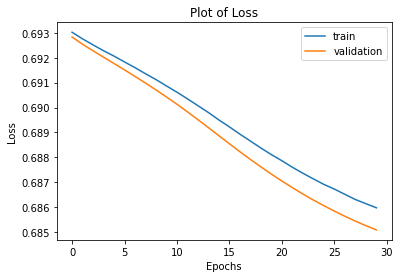

In [ ]:
# plot the training  Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

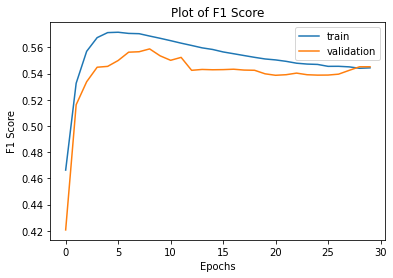

In [ ]:
# plot the training  F1 Score
import matplotlib.pyplot as plt

plt.plot(history.history['f1_metric'], label='train')
plt.plot(history.history['val_f1_metric'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Plot of F1 Score')
plt.legend()
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_train, y_train, n_repeats=30, random_state=1)
eli5.show_weights(r, feature_names = X.columns.tolist())


TypeError: ignored